# Data Preparation

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# connect to your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def get_result(query):
    conn = sqlite3.connect("/content/drive/MyDrive/olist.db")
    cursor = conn.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    return data

In [5]:
# olist_order_items_dataset
olist_order_items_dataset = get_result('SELECT * FROM olist_order_items_dataset')
olist_order_items_dataset = pd.DataFrame(olist_order_items_dataset, columns=['index','order_id','order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freiqht_value']).set_index('index')
olist_order_items_dataset.sample()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freiqht_value
index,,,,,,,
108491,f697830f52a6a751ee9469385da12bf4,1,50a88b3bd7a9d8db2f1addc427b4446b,4a3ca9315b744ce9f8e9374361493884,2017-11-30 19:36:23,125.0,21.36


In [6]:
# olist_products_dataset
olist_products_dataset = get_result('SELECT * FROM olist_products_dataset')
olist_products_dataset = pd.DataFrame(olist_products_dataset, columns=['index','product_id','product_category_name', 'product_name_length', 'product_description_length', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']).set_index('index')
olist_products_dataset.sample(3)

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
index,,,,,,,,,
16648,95fcb44ada4cefca4f03cc0b4b69ee33,beleza_saude,55.0,1530.0,1.0,1600.0,22.0,14.0,22.0
16954,0f80ccf7348ba5bda717ff8fadf34552,fashion_bolsas_e_acessorios,35.0,1422.0,6.0,7550.0,60.0,15.0,50.0
12044,c8e98656b0bfc1efbadc25aa3fb9640e,beleza_saude,60.0,1256.0,1.0,683.0,18.0,14.0,15.0


In [7]:
# olist_order_reviews_dataset
olist_order_reviews_dataset = get_result('SELECT * FROM olist_order_reviews_dataset')
olist_order_reviews_dataset = pd.DataFrame(olist_order_reviews_dataset, columns=['index','review_id','order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']).set_index('index')
olist_order_reviews_dataset.sample()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
index,,,,,,,
92231,867e3b32d44948073defb7fb98bb5a45,13c208c7221faed9cb7ac326a6f873da,5,None,None,2018-07-31 00:00:00,2018-08-03 19:42:51


In [8]:
# product_category_name_translation
product_category_name_translation = get_result('SELECT * FROM product_category_name_translation')
product_category_name_translation = pd.DataFrame(product_category_name_translation, columns=['index','product_category_name', 'product_category_name_english']).set_index('index')
product_category_name_translation.sample()

,product_category_name,product_category_name_english
index,,
41,instrumentos_musicais,musical_instruments


# Data cleasning

In [9]:
olist_order_items_dataset.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freiqht_value          0
dtype: int64

In [10]:
olist_order_items_dataset.duplicated().sum()

0

In [11]:
olist_products_dataset.isnull().sum()

product_id                      0
product_category_name         610
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [12]:
olist_products_dataset.duplicated().sum()

0

In [13]:
olist_order_reviews_dataset.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [14]:
olist_order_reviews_dataset.duplicated().sum()

0

In [15]:
product_category_name_translation.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [16]:
product_category_name_translation.duplicated().sum()

0

In [17]:
product_category_name_translation.sample()

,product_category_name,product_category_name_english
index,,
45,alimentos,food


In [18]:
product_category_name_translation['product_category_name_english'].unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

In [19]:
product_category_name_translation = product_category_name_translation.replace({"home_confort": "home_comfort", "home_comfort_2": "home_comfort", "home_appliances_2":"home_appliances"})

product_category_name_translation["product_category_name_english"].unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_comfort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

In [20]:
df = pd.merge(olist_order_items_dataset, olist_products_dataset, on="product_id", how="left")
df1 = pd.merge(df, product_category_name_translation, on="product_category_name", how="left")

In [21]:
df1.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freiqht_value,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [22]:
df1.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freiqht_value                       0
product_category_name            1603
product_name_length              1603
product_description_length       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
product_category_name_english    1627
dtype: int64

In [23]:
df1[["product_category_name","product_category_name_english"]].loc[(df1["product_category_name"].notna()) & (df1["product_category_name_english"].isna())]

,product_category_name,product_category_name_english
3228,portateis_cozinha_e_preparadores_de_alimentos,NaN
12976,pc_gamer,NaN
12977,pc_gamer,NaN
13025,portateis_cozinha_e_preparadores_de_alimentos,NaN
18629,pc_gamer,NaN
19702,portateis_cozinha_e_preparadores_de_alimentos,NaN
31806,pc_gamer,NaN
32887,pc_gamer,NaN
36976,portateis_cozinha_e_preparadores_de_alimentos,NaN
37083,portateis_cozinha_e_preparadores_de_alimentos,NaN


In [24]:
df1["product_category_name_english"] = df1["product_category_name_english"].fillna(df1["product_category_name"].map({"pc_gamer":"pc_gamer", 
         "portateis_cozinha_e_preparadores_de_alimentos":
         "kitchen_and_food_preparators_portables", None:"others"}))

df1.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freiqht_value                       0
product_category_name            1603
product_name_length              1603
product_description_length       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
product_category_name_english       0
dtype: int64

# Analisa

In [25]:
df1_summary = df1[["product_category_name_english","price"]].groupby(
    "product_category_name_english").sum().sort_values(
    "price", ascending=False).reset_index()
df1_summary

,product_category_name_english,price
0,health_beauty,1258681.34
1,watches_gifts,1205005.68
2,bed_bath_table,1036988.68
3,sports_leisure,988048.97
4,computers_accessories,911954.32
...,...,...
67,pc_gamer,1545.95
68,flowers,1110.04
69,cds_dvds_musicals,730.00
70,fashion_childrens_clothes,569.85


In [26]:
df1.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freiqht_value,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


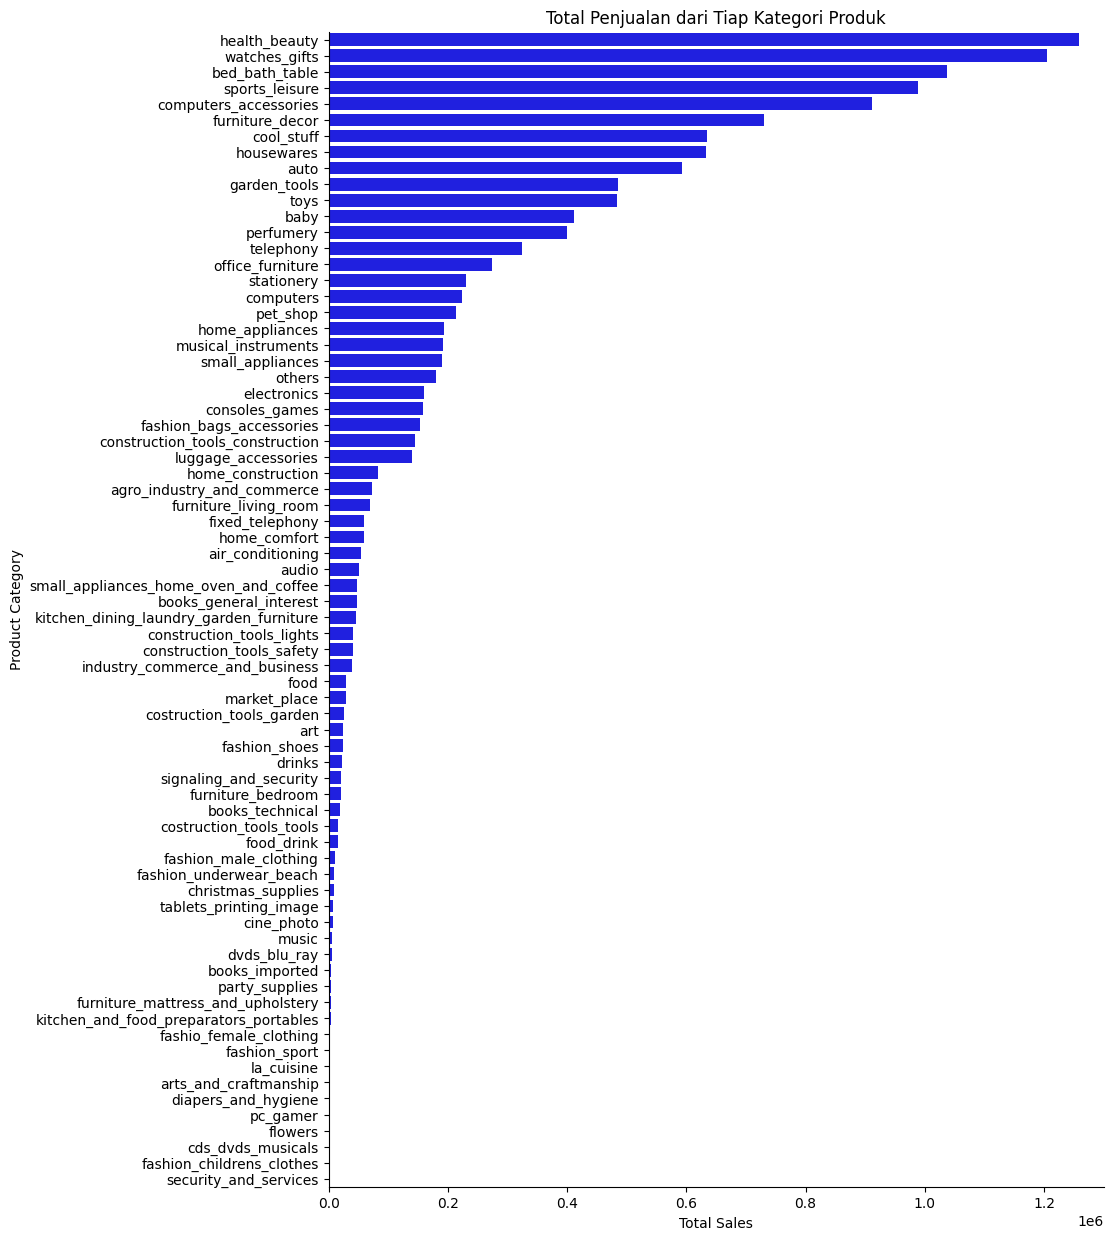

In [27]:
f, ax = plt.subplots(figsize=(10, 15))

sns.barplot(y="product_category_name_english", x="price", data=df1_summary, color="b")
sns.set_style("whitegrid")

ax.set(xlim=(0, 1_300_000), ylabel="Product Category", xlabel="Total Sales", title="Total Penjualan dari Tiap Kategori Produk")

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

In [28]:
df2_summary = df1[["product_category_name_english","order_id"]].groupby(
    "product_category_name_english").count().sort_values(
    "order_id", ascending=False).reset_index()
df2_summary

,product_category_name_english,order_id
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827
...,...,...
67,cds_dvds_musicals,14
68,la_cuisine,14
69,pc_gamer,9
70,fashion_childrens_clothes,8


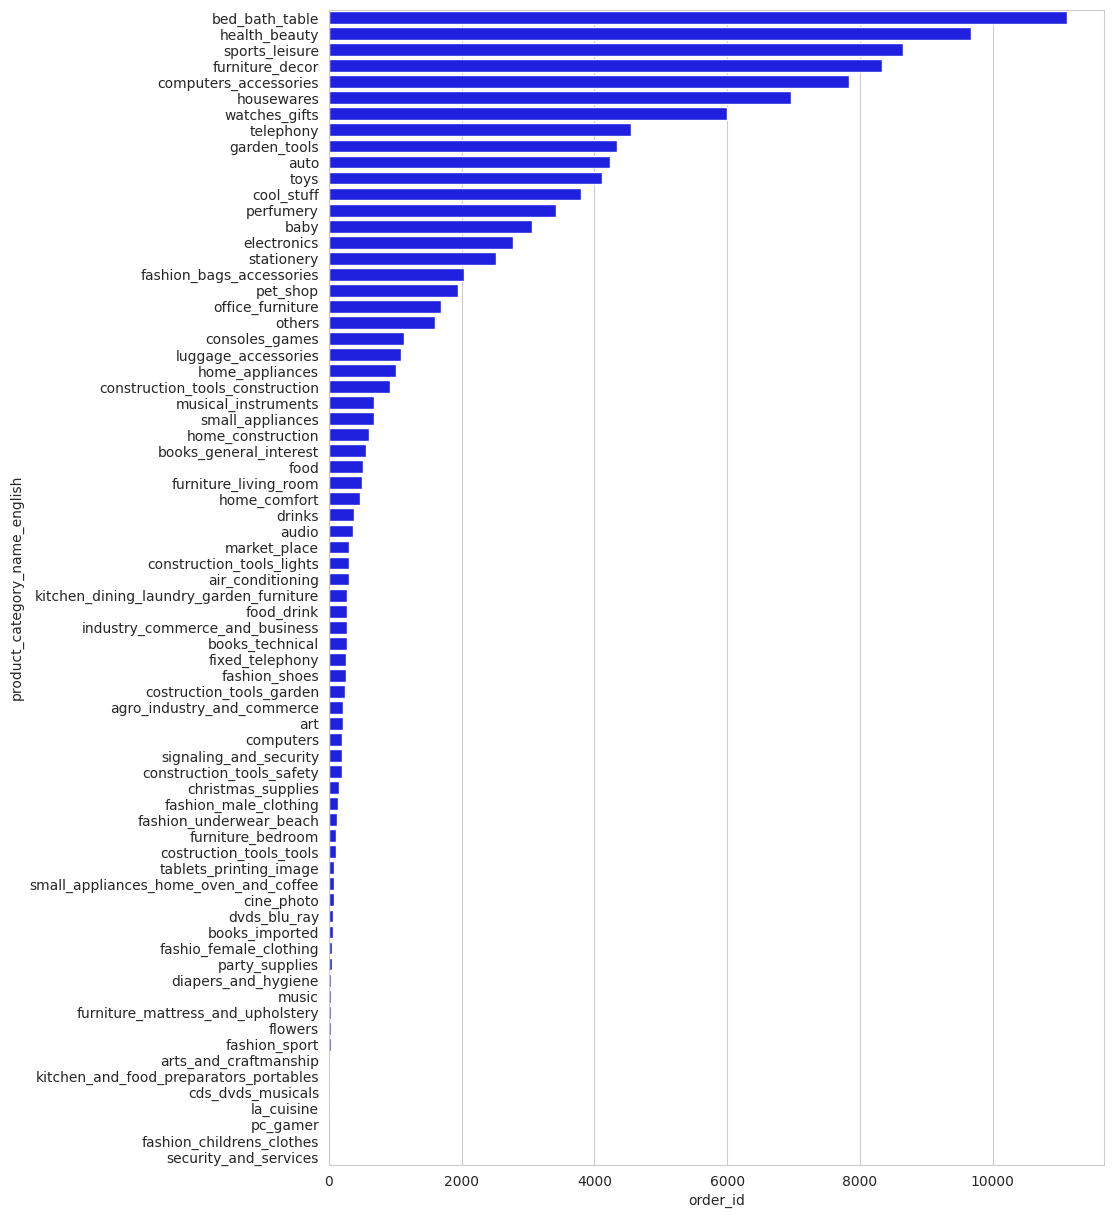

In [29]:
f, ax = plt.subplots(figsize=(10, 15))

sns.barplot(y="product_category_name_english", x="order_id", data=df2_summary, color="b")
sns.set_style("whitegrid")


In [30]:
olist_order_reviews_dataset.sample()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
index,,,,,,,
65339,a5f2375e2f588da52bf5075a91432eb6,2dcf5497d9dc70e0e723bbc2bd26fe7d,2,None,Gostaria de receber ainda meu pedido. Fazia pa...,2017-12-28 00:00:00,2017-12-28 09:18:19


In [32]:
df3 = pd.merge(df1, olist_order_reviews_dataset, on="order_id", how="left")


In [33]:
df3.sample()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freiqht_value,product_category_name,product_name_length,product_description_length,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
48312,6d1a62fa0b7ad62bdea639088be1e5f5,1,fb5bf004540ad1453e3903bdd2162293,6989574bd97d9773f10d232b6c07da59,2018-07-31 13:24:20,319.9,56.32,malas_acessorios,48.0,395.0,...,16.0,98.0,33.0,luggage_accessories,0783534423d1791b1891084d5cbaa898,5.0,None,None,2018-08-01 00:00:00,2018-08-01 18:44:06


In [38]:
df3_summary = df3[["product_category_name_english","review_score"]].groupby(
    "product_category_name_english").mean().sort_values(
    "review_score", ascending=False).reset_index()
df3_summary.head(5)

,product_category_name_english,review_score
0,cds_dvds_musicals,4.642857
1,fashion_childrens_clothes,4.500000
2,books_general_interest,4.446266
3,costruction_tools_tools,4.444444
4,flowers,4.419355


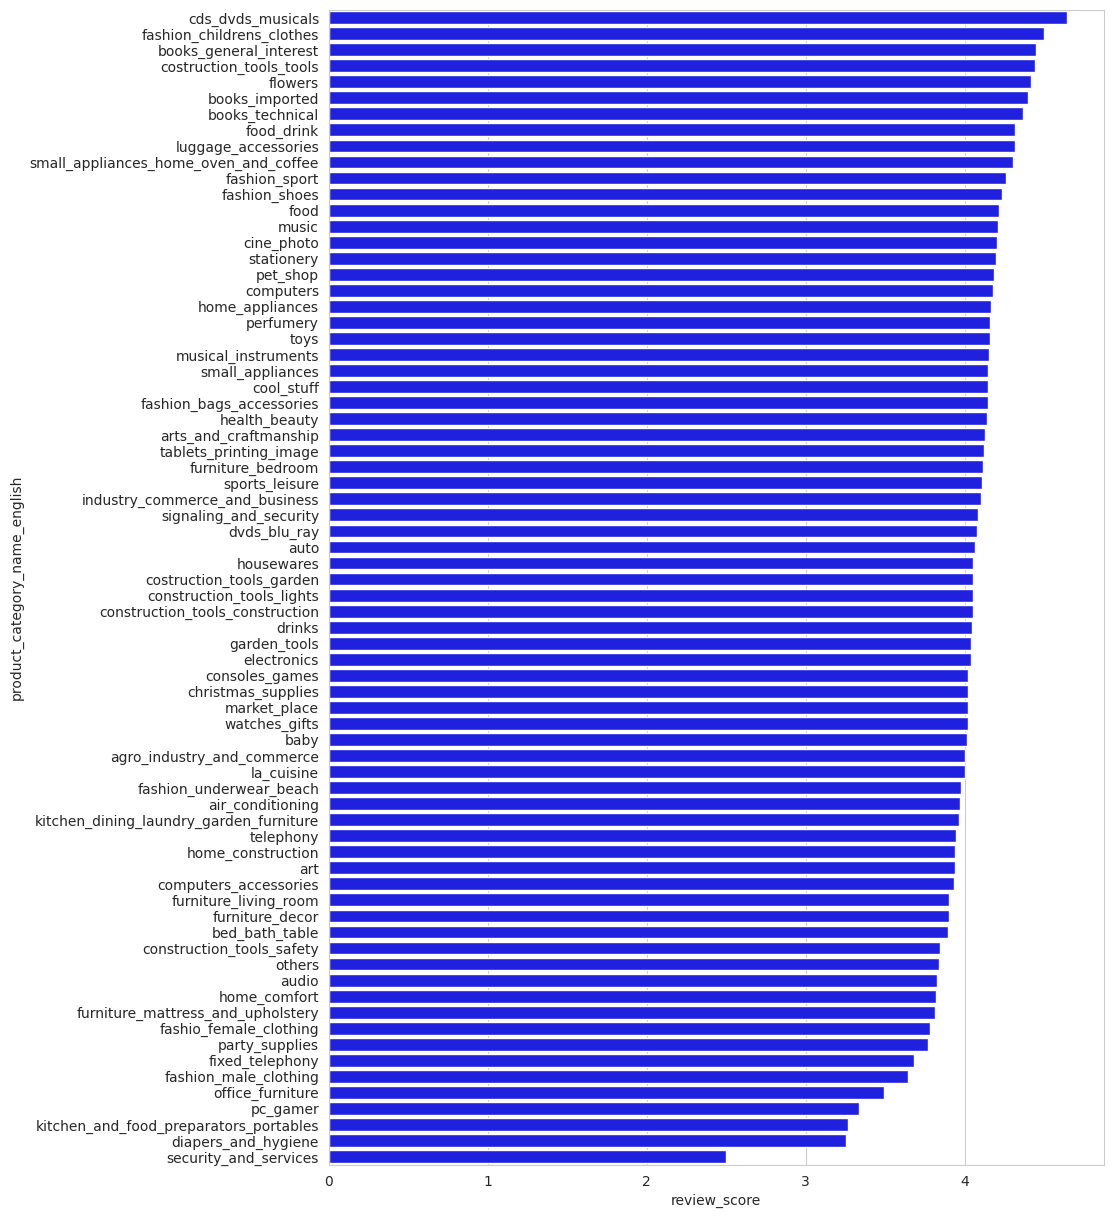

In [40]:
f, ax = plt.subplots(figsize=(10, 15))

sns.barplot(y="product_category_name_english", x="review_score", data=df3_summary, color="b")
sns.set_style("whitegrid")


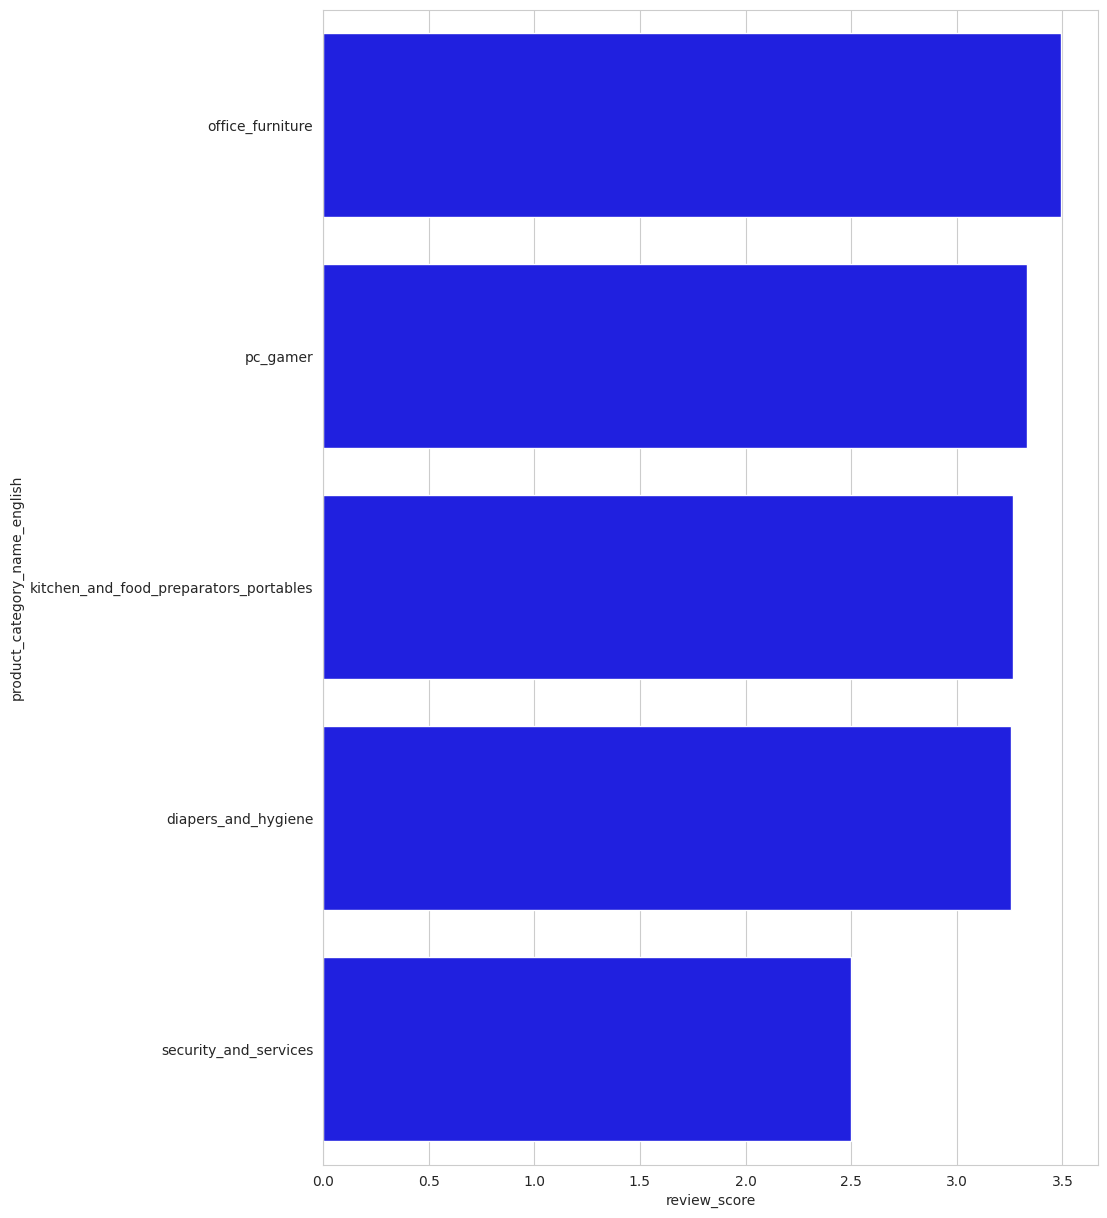

In [41]:
f, ax = plt.subplots(figsize=(10, 15))

sns.barplot(y="product_category_name_english", x="review_score", data=df3_summary.tail(), color="b")
sns.set_style("whitegrid")
